## Clasificadores para rostros

In [8]:
import cv2
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import os

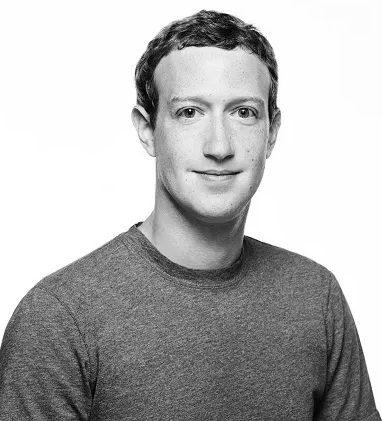

In [9]:
#Cargamos la imagen y la pasamos a gris
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/Mark_Zuckerberg.PNG')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [10]:
#Cargamos el modelo
haar_cascade = cv.CascadeClassifier(r'/content/drive/MyDrive/Dataset_Modeling/haar_face.xml')

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors = 3)
print(len(faces_rect))
#Detecta una cara

1


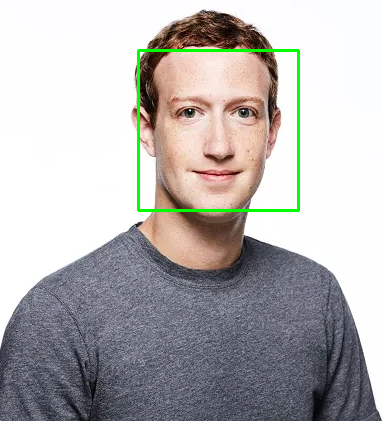

In [11]:
#Lo aplicamos a nuestra imagen
for (x,y,w,h) in faces_rect:
  cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), thickness = 2)

cv2_imshow(img)

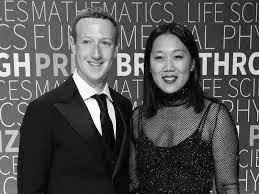

In [12]:
img2 = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/Mark2person.jpg')

gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [13]:
faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors = 3)
print(len(faces_rect))
#Detecta una cara

2


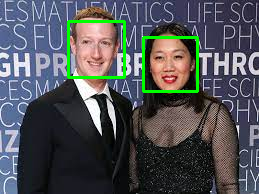

In [14]:
#Lo aplicamos a nuestra imagen
for (x,y,w,h) in faces_rect:
  cv.rectangle(img2, (x,y), (x+w, y+h), (0,255,0), thickness = 2)

cv2_imshow(img2)

5


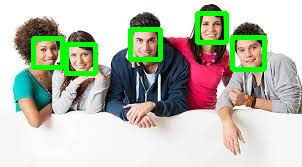

In [15]:
#Detecta la foto del grupo
img_gente = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/grupo.jpg')

gray = cv.cvtColor(img_gente, cv.COLOR_BGR2GRAY)
faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors = 3)#Cambiando los vecinos minimos hacemos que el algoritmo coja mas o menos pixeles. Cuantos menos coja mas preciso pero mas propenso al ruido
print(len(faces_rect))

for (x,y,w,h) in faces_rect:
  cv.rectangle(img_gente, (x,y), (x+w, y+h), (0,255,0), thickness = 3)

cv2_imshow(img_gente)

## Modelo de clasificación de caras

In [16]:
people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']

p = []

DIR = r'/content/drive/MyDrive/Dataset_Modeling/Faces/train/'

for i in os.listdir(r'/content/drive/MyDrive/Dataset_Modeling/Faces/train'):
  p.append(i)

print(p)

['Madonna', 'Jerry Seinfield', 'Elton John', 'Mindy Kaling', 'Ben Afflek']


In [17]:
people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']
DIR = r'/content/drive/MyDrive/Dataset_Modeling/Faces/train/'

haar_cascade = cv.CascadeClassifier(r'/content/drive/MyDrive/Dataset_Modeling/haar_face.xml')

features = []
labels = []

def create_train():
  for person in people:
    path = os.path.join(DIR, person)
    label = people.index(person)

    for img in os.listdir(path):
      img_path = os.path.join(path, img)

      img_array = cv.imread(img_path)
      gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)

      faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors = 4)
      for (x,y,w,h) in faces_rect:
        faces_roi = gray[y:y+h, x:x+w]
        features.append(faces_roi)
        labels.append(label)

create_train()
print(f'Length of the features = {len(features)}')
print(f'Length of the labels = {len(labels)}')

Length of the features = 100
Length of the labels = 100


In [18]:
features = np.array(features, dtype='object')
labels = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()

#Train the Recognizer
face_recognizer.train(features, labels)

face_recognizer.save('face_trained.yml')
np.save('features.npy', features)
np.save('labels.npy', labels)

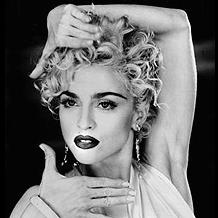

label = Madonna with a confidence of 96.81807061458018


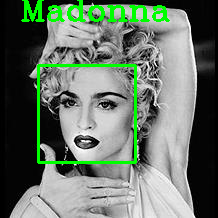

In [19]:
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/Faces/val/madonna/4.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors = 4)

for (x,y,w,h) in faces_rect:

  faces_roi = gray[y:y+h, x:x+h]

  label, confidence = face_recognizer.predict(faces_roi)
  print(f'label = {people[label]} with a confidence of {confidence}')

  cv.putText(img, str(people[label]), (20,20), cv.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness = 2)
  cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), thickness = 2)
  
cv2_imshow(img)